In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

<font size="3">Salem, MO: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [2]:
#1 hr hrrr:
with open('hrrr_f01_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.    0.006 0.006 0.006 0.006 0.006 0.006 0.006
 0.006 0.006 0.006 0.006 0.006 0.006 0.011 0.997 1.315 1.322 1.325 1.327
 1.329]
25


In [3]:
#Air Temp CRN:
with open('CRNH0203-2022-MO_Salem_10_W.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.5 0.5 1.3 1.3 1.3]


In [4]:
hour=[]
for i in range(-12,13,1):
    hour.append(i)
    i+=1
print(len(hour))

25


In [5]:
difference_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sal.append(temp_i-temp_crn_i)

print(difference_sal)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.011, 0.997, 0.815, 0.8219999999999998, 0.02499999999999969, 0.02699999999999969, 0.028999999999999693]


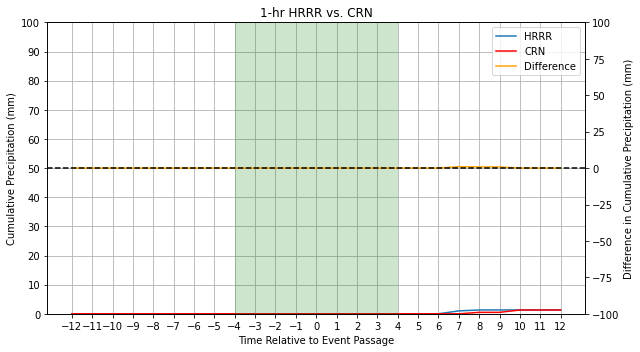

In [6]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sal, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [7]:
#3 hr hrrr:
with open('hrrr_f03_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e-03 8.100e-01 1.326e+00
 1.687e+00 1.837e+00 1.858e+00 1.867e+00]


In [8]:
diff3_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sal.append(temp_i-temp_crn_i)

print(diff3_sal)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.81, 0.8260000000000001, 1.187, 0.5369999999999999, 0.5579999999999998, 0.5669999999999997]


In [9]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='yellow', alpha=0.2, lw=0)
# plt.show()

In [10]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",salem3)

In [11]:
#6 hr hrrr:
with open('hrrr_f06_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.424 1.436 1.436 1.436 1.456 1.456 1.456 1.456 1.456 1.456 1.456 1.456
 1.456 1.456 1.456 1.456 1.456 1.456 1.456 3.575 6.177 6.409 6.423 7.3
 7.605]


In [12]:
diff6_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sal.append(temp_i-temp_crn_i)

print(diff6_sal)

[1.424, 1.436, 1.436, 1.436, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 1.456, 3.575, 5.677, 5.909, 5.123, 6.0, 6.305]


In [13]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [14]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",salem6)

In [15]:
#12 hr hrrr:
with open('hrrr_f12_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.071 0.071 0.071 0.071 0.071 0.071 0.071 0.071 0.071 0.071 0.071 0.071
 0.071 0.071 0.071 0.071 0.262 0.28  0.281 3.271 5.159 5.597 5.747 5.834
 5.913]
25


In [16]:
diff12_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sal.append(temp_i-temp_crn_i)

print(diff12_sal)

[0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.071, 0.262, 0.28, 0.281, 3.2710000000000004, 4.659000000000001, 5.097, 4.447000000000001, 4.534000000000001, 4.613]


In [17]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [18]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",salem12)

In [19]:
#18 hr hrrr:
with open('hrrr_f18_Salem_MO.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.023 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.024 0.024
 0.024 0.024 0.024 0.024 0.027 0.027 0.321 1.053 1.378 3.512 4.337 4.494
 4.919]


In [20]:
diff18_sal = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sal.append(temp_i-temp_crn_i)

print(diff18_sal)

[0.023, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.024, 0.027, 0.027, 0.321, 1.053, 0.8779999999999999, 3.0119999999999996, 3.037, 3.194, 3.6189999999999998]


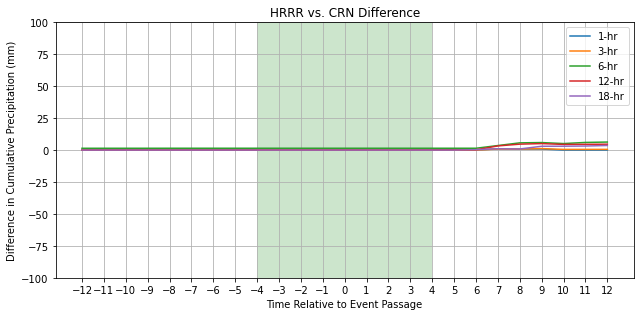

In [21]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,label="1-hr")
plt.plot(hour,diff3_sal,label="3-hr")
plt.plot(hour,diff6_sal,label="6-hr")
plt.plot(hour,diff12_sal,label="12-hr")
plt.plot(hour,diff18_sal,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

In [22]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# salem18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",salem18)

<font size="3">Batesville, AR: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [23]:
#1 hr hrrr:
with open('hrrr_f01_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.453  1.023  1.132  1.17   1.236  1.236  1.236  1.236  1.236  1.236
  1.236  1.236  1.236  1.236  1.236  1.236  1.236  1.236  1.236  1.236
  1.236  1.236  5.784 10.854 12.411]


In [24]:
#Air Temp CRN:
with open('CRNH0203-2022-AR_Batesville_8_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 2.3  4.4  4.4  4.6  4.6  4.6  4.6  4.6  4.6  4.6  4.6  4.6  4.6  4.6
  4.6  4.6  4.6  4.6  4.6  4.6  4.6  4.6 14.8 18.9 18.9]


In [25]:
difference_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bat.append(temp_i-temp_crn_i)

print(difference_bat)

[-1.8469999999999998, -3.3770000000000007, -3.2680000000000007, -3.4300000000000006, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -3.3640000000000008, -9.016000000000002, -8.046, -6.488999999999999]


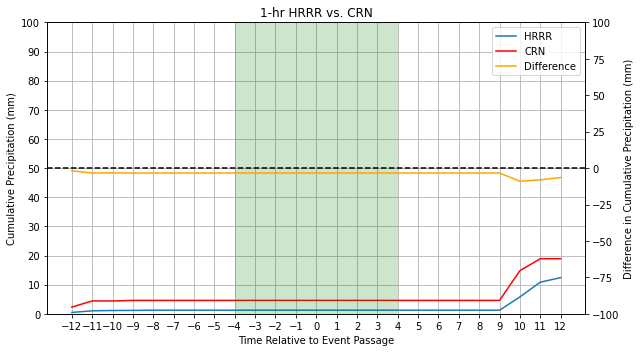

In [26]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bat, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [27]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [28]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",batesville1)

In [29]:
#3 hr hrrr:
with open('hrrr_f03_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.075  0.793  0.943  1.218  4.661  4.682  4.682  4.682  4.682  4.682
  4.682  4.682  4.682  4.682  4.682  4.682  4.682  4.682  4.682  4.682
  4.682  4.682  8.596 11.443 11.479]


In [30]:
diff3_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bat.append(temp_i-temp_crn_i)

print(diff3_bat)

[-2.2249999999999996, -3.607, -3.4570000000000003, -3.3820000000000006, 0.060999999999999055, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, 0.08199999999999896, -6.204000000000001, -7.456999999999999, -7.420999999999999]


In [31]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [32]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",batesville3)

In [33]:
#6 hr hrrr:
with open('hrrr_f06_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.542 0.568 0.569 0.617 0.735 1.497 1.497 1.497 1.497 1.497 1.497 1.497
 1.497 1.497 1.497 1.497 1.497 1.497 1.497 1.497 1.497 1.497 1.608 2.269
 5.403]


In [34]:
diff6_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bat.append(temp_i-temp_crn_i)

print(diff6_bat)

[-1.7579999999999998, -3.8320000000000003, -3.8310000000000004, -3.9830000000000005, -3.865, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -3.1030000000000006, -13.192, -16.631, -13.496999999999998]


In [35]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [36]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",batesville6)

In [37]:
#12 hr hrrr:
with open('hrrr_f12_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.591 1.214 1.218 1.222 1.222 1.225 1.225 1.225 1.225 1.225 1.225 1.225
 1.225 1.225 1.225 1.225 1.225 1.226 1.226 1.229 1.232 1.234 1.235 5.378
 6.518]
25


In [38]:
diff12_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bat.append(temp_i-temp_crn_i)

print(diff12_bat)

[-1.7089999999999999, -3.1860000000000004, -3.1820000000000004, -3.3780000000000006, -3.3780000000000006, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.375000000000001, -3.3740000000000006, -3.3740000000000006, -3.371000000000001, -3.368000000000001, -3.366000000000001, -13.565000000000001, -13.521999999999998, -12.382]


In [39]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [40]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",batesville12)

In [41]:
#18 hr hrrr:
with open('hrrr_f18_Batesville_AR.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.179  0.459  0.559  0.559  1.142  1.142  1.142  1.142  1.142  1.142
  1.142  1.142  1.142  1.142  1.142  1.142  1.142  1.142  1.142  1.142
  1.142  1.143  1.237 16.164 16.231]


In [42]:
diff18_bat = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bat.append(temp_i-temp_crn_i)

print(diff18_bat)

[-2.121, -3.9410000000000003, -3.841, -4.041, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4580000000000006, -3.4570000000000007, -13.563, -2.7360000000000007, -2.6690000000000005]


In [43]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [44]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# batesville18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",batesville18)

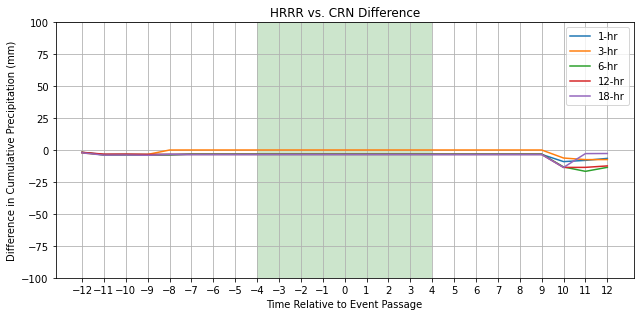

In [45]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bat,label="1-hr")
plt.plot(hour,diff3_bat,label="3-hr")
plt.plot(hour,diff6_bat,label="6-hr")
plt.plot(hour,diff12_bat,label="12-hr")
plt.plot(hour,diff18_bat,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Lafayette, LA: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [46]:
#1 hr hrrr:
with open('hrrr_f01_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[1.0000e-03 4.0000e-02 8.4300e-01 1.0760e+01 1.3978e+01 1.7656e+01
 1.7658e+01 2.0320e+01 2.0407e+01 2.0600e+01 2.0606e+01 2.0606e+01
 2.0609e+01 2.0609e+01 2.0609e+01 2.0609e+01 2.0609e+01 2.0609e+01
 2.0610e+01 2.0610e+01 2.0610e+01 2.0610e+01 2.0610e+01 2.0610e+01
 2.0610e+01]


In [47]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Lafayette_13_SE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[0.  0.  1.3 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8 5.8
 5.8 5.8 5.8 5.8 5.8 5.8 5.8]


In [48]:
difference_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_laf.append(temp_i-temp_crn_i)

print(difference_laf)

[0.001, 0.04, -0.45699999999999996, 4.96, 8.178, 11.855999999999998, 11.857999999999997, 14.519999999999996, 14.606999999999996, 14.799999999999997, 14.805999999999997, 14.805999999999997, 14.808999999999997, 14.808999999999997, 14.808999999999997, 14.808999999999997, 14.808999999999997, 14.808999999999997, 14.809999999999999, 14.809999999999999, 14.809999999999999, 14.809999999999999, 14.809999999999999, 14.809999999999999, 14.809999999999999]


In [49]:
# hour=[]
# for i in range(-15,16,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

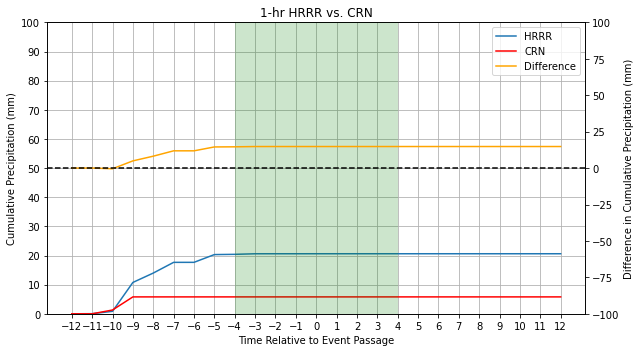

In [50]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_laf, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [51]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [52]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",lafayette1)

RSME 1-hr 48-hr HRRR vs CRN : 13.123612827266733


In [53]:
#3 hr hrrr:
with open('hrrr_f03_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.013 1.343 1.35  1.35  1.353 1.434 5.202 5.68
 5.68  5.797 5.797 5.797 5.797 5.811 5.811 5.811 5.811 5.811 5.811 5.811
 5.811]


In [54]:
diff3_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_laf.append(temp_i-temp_crn_i)

print(diff3_laf)

[0.0, 0.0, -1.3, -5.8, -5.787, -4.457, -4.45, -4.45, -4.447, -4.366, -0.5979999999999999, -0.1200000000000001, -0.1200000000000001, -0.0030000000000001137, -0.0030000000000001137, -0.0030000000000001137, -0.0030000000000001137, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012, 0.01100000000000012]


In [55]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [56]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",lafayette3)

RSME 3-hr 48-hr HRRR vs CRN : 2.5885470132875703


In [57]:
#6 hr hrrr:
with open('hrrr_f06_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.    0.    0.004 0.013 0.014 0.014 0.015 0.015 0.015
 0.015 0.015 0.016 0.016 0.016 0.016 0.016 0.016 0.023 0.025 0.026 0.028
 0.029]


In [58]:
diff6_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_laf.append(temp_i-temp_crn_i)

print(diff6_laf)

[0.0, 0.0, -1.3, -5.8, -5.8, -5.796, -5.787, -5.786, -5.786, -5.785, -5.785, -5.785, -5.785, -5.785, -5.784, -5.784, -5.784, -5.784, -5.784, -5.784, -5.777, -5.7749999999999995, -5.774, -5.772, -5.771]


In [59]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [60]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",lafayette6)

RSME 6-hr 48-hr HRRR vs CRN : 5.432316238953693


In [61]:
#12 hr hrrr:
with open('hrrr_f12_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[0.03  0.232 0.232 0.387 0.47  0.47  0.47  0.47  0.47  0.47  0.47  0.47
 0.47  0.47  0.47  0.476 0.476 0.476 0.476 0.476 0.476 0.476 0.476 0.476
 0.476]
25


In [62]:
diff12_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_laf.append(temp_i-temp_crn_i)

print(diff12_laf)

[0.03, 0.232, -1.068, -5.413, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.33, -5.324, -5.324, -5.324, -5.324, -5.324, -5.324, -5.324, -5.324, -5.324, -5.324]


In [63]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [64]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",lafayette12)

RSME 12-hr 48-hr HRRR vs CRN : 5.005770977581775


In [65]:
#18 hr hrrr:
with open('hrrr_f18_Lafayette_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.005 0.68  0.81  0.82  0.82  0.82  0.82  0.82  0.82  0.82  0.82  0.82
 0.82  0.821 0.821 0.821 0.821 0.821 0.821 0.821 0.821 0.821 0.821 0.821
 0.821]


In [66]:
diff18_laf = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_laf.append(temp_i-temp_crn_i)

print(diff18_laf)

[0.005, 0.68, -0.49, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.9799999999999995, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979, -4.979]


In [67]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [68]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
lafayette18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",lafayette18)

RSME 18-hr 48-hr HRRR vs CRN : 4.6741494071114165


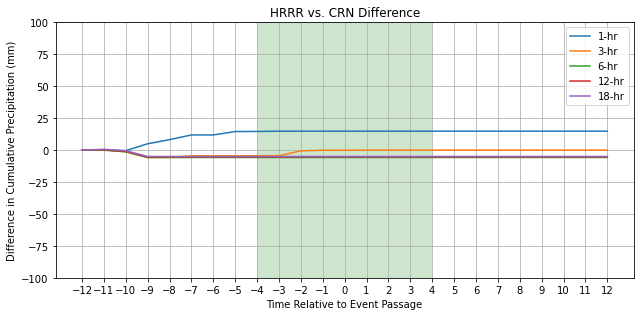

In [69]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_laf,label="1-hr")
plt.plot(hour,diff3_laf,label="3-hr")
plt.plot(hour,diff6_laf,label="6-hr")
plt.plot(hour,diff12_laf,label="12-hr")
plt.plot(hour,diff18_laf,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Monroe, LA: 1000 UTC 5 April 2022-1000 UTC 6 April 2022</font>

In [70]:
#1 hr hrrr:
with open('hrrr_f01_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[2.602 2.858 3.107 3.173 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175
 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175 3.175
 3.175]


In [71]:
#Air Temp CRN:
with open('CRNH0203-2022-LA_Monroe_26_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2265:2290]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[8.4 9.2 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4 9.4
 9.4 9.4 9.4 9.4 9.4 9.4 9.4]


In [72]:
difference_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_mon.append(temp_i-temp_crn_i)

print(difference_mon)

[-5.798, -6.342000000000001, -6.293000000000001, -6.227, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001, -6.225000000000001]


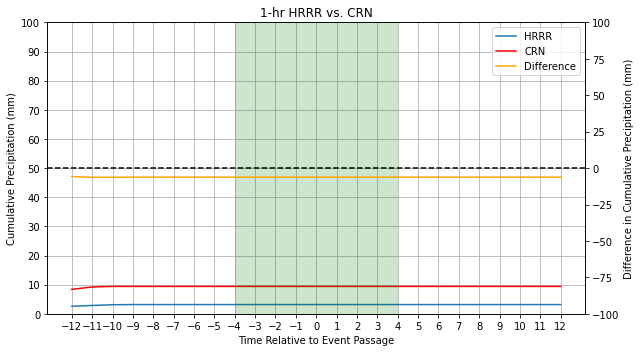

In [73]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_mon, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [74]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [75]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",monroe1)

RSME 1-hr 48-hr HRRR vs CRN : 6.2160381948633505


In [76]:
#3 hr hrrr:
with open('hrrr_f03_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[8.257 8.328 8.329 8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33
 8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33  8.33
 8.33 ]


In [77]:
diff3_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_mon.append(temp_i-temp_crn_i)

print(diff3_mon)

[-0.14300000000000068, -0.8720000000000017, -1.0710000000000015, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002, -1.070000000000002]


In [78]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [79]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",monroe3)

RSME 3-hr 48-hr HRRR vs CRN : 1.041454252475837


In [80]:
#6 hr hrrr:
with open('hrrr_f06_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2260:2285]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[5.721 6.286 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287
 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287 6.287
 6.287]


In [81]:
diff6_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_mon.append(temp_i-temp_crn_i)

print(diff6_mon)

[-2.6790000000000003, -2.9140000000000015, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004, -3.1130000000000004]


In [82]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [83]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",monroe6)

RSME 6-hr 48-hr HRRR vs CRN : 3.089052437237025


In [84]:
#12 hr hrrr:
with open('hrrr_f12_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2254:2279]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[21.159 25.334 25.955 25.955 25.955 25.955 25.955 25.955 25.955 25.955
 25.955 25.955 25.955 25.955 25.955 25.955 25.955 25.955 25.955 25.955
 25.955 25.955 25.955 25.955 25.955]
25


In [85]:
diff12_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_mon.append(temp_i-temp_crn_i)

print(diff12_mon)

[12.758999999999999, 16.134, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555, 16.555]


In [86]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [87]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",monroe12)

RSME 12-hr 48-hr HRRR vs CRN : 16.403246766417922


In [88]:
#18 hr hrrr:
with open('hrrr_f18_Monroe_LA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2248:2273]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[18.973 19.439 19.529 19.545 19.545 19.545 19.545 19.545 19.545 19.545
 19.545 19.545 19.545 19.545 19.545 19.545 19.545 19.545 19.545 19.545
 19.545 19.545 19.545 19.545 19.545]


In [89]:
diff18_mon = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_mon.append(temp_i-temp_crn_i)

print(diff18_mon)

[10.572999999999999, 10.238999999999999, 10.129, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998, 10.144999999999998]


In [90]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [91]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
monroe18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",monroe18)

RSME 18-hr 48-hr HRRR vs CRN : 10.16559814472321


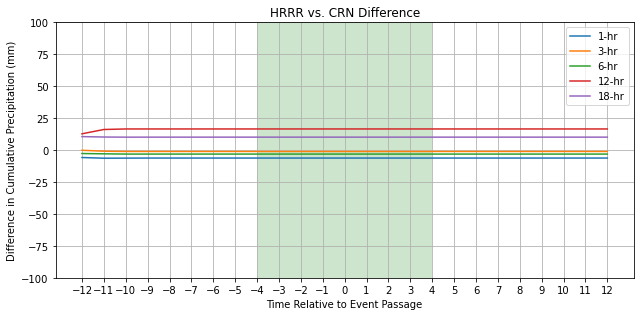

In [92]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_mon,label="1-hr")
plt.plot(hour,diff3_mon,label="3-hr")
plt.plot(hour,diff6_mon,label="6-hr")
plt.plot(hour,diff12_mon,label="12-hr")
plt.plot(hour,diff18_mon,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Holly Springs, MS: 1100 UTC 5 April 2022-1100 UTC 6 April 2022</font>

In [93]:
#1 hr hrrr:
with open('hrrr_f01_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.725 2.633 7.293 7.317 7.384 7.816 7.82  7.82  7.82  7.82  7.82  7.82
 7.82  7.82  7.82  7.82  7.82  7.82  7.82  7.82  7.82  7.82  7.825 7.828
 7.838]


In [94]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Holly_Springs_4_N.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2266:2291]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 4.2  9.1  9.7  9.7 11.2 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6
 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6 11.6]


In [95]:
difference_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_hol.append(temp_i-temp_crn_i)

print(difference_hol)

[-3.475, -6.467000000000001, -2.407000000000001, -2.383000000000001, -3.8160000000000007, -3.7840000000000007, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.780000000000001, -3.7750000000000012, -3.772000000000001, -3.7620000000000013]


In [96]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [97]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",holly1)

RSME 1-hr 48-hr HRRR vs CRN : 3.8235910712313377


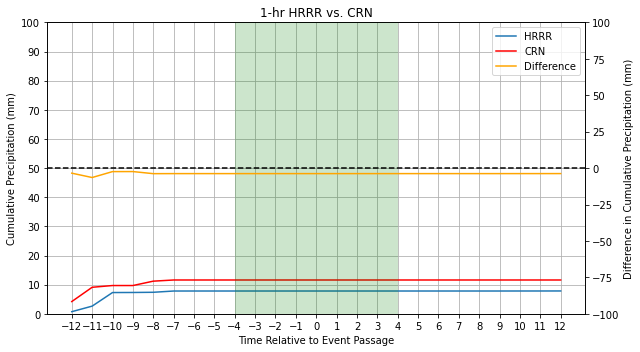

In [98]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_hol, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [99]:
#3 hr hrrr:
with open('hrrr_f03_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2264:2289]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.338 4.651 6.935 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025
 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025 7.025
 7.026]


In [100]:
diff3_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_hol.append(temp_i-temp_crn_i)

print(diff3_hol)

[-3.862, -4.449000000000002, -2.7650000000000015, -2.6750000000000016, -4.175000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.575000000000002, -4.574000000000002]


In [101]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [102]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",holly3)

RSME 3-hr 48-hr HRRR vs CRN : 4.407010192863186


In [103]:
#6 hr hrrr:
with open('hrrr_f06_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2261:2286]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.912  4.275  8.29   8.293  8.672 11.004 11.009 11.102 11.102 11.102
 11.102 11.102 11.102 11.102 11.102 11.102 11.102 11.102 11.102 11.102
 11.102 11.102 11.102 11.102 11.102]


In [104]:
diff6_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_hol.append(temp_i-temp_crn_i)

print(diff6_hol)

[-3.2880000000000003, -4.825000000000001, -1.410000000000002, -1.4070000000000018, -2.5280000000000022, -0.5960000000000036, -0.5910000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029, -0.4980000000000029]


In [105]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [106]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",holly6)

RSME 6-hr 48-hr HRRR vs CRN : 1.4088104343736256


In [107]:
#12 hr hrrr:
with open('hrrr_f12_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2255:2280]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 1.171  4.742  9.94   9.981  9.982 10.054 10.289 10.289 10.289 10.289
 10.289 10.289 10.289 10.289 10.289 10.289 10.289 10.289 10.289 10.289
 10.289 10.289 10.289 10.289 10.292]
25


In [108]:
diff12_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_hol.append(temp_i-temp_crn_i)

print(diff12_hol)

[-3.029, -4.358000000000001, 0.2400000000000002, 0.2810000000000006, -1.218, -1.5460000000000012, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3110000000000017, -1.3080000000000016]


In [109]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [110]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",holly12)

RSME 12-hr 48-hr HRRR vs CRN : 1.6102800750180086


In [111]:
#18 hr hrrr:
with open('hrrr_f18_Holly Springs_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2249:2274]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.354  3.434 10.16  12.465 12.484 13.768 14.258 14.271 14.271 14.271
 14.271 14.271 14.271 14.271 14.271 14.271 14.271 14.271 14.271 14.271
 14.271 14.271 14.271 14.271 14.273]


In [112]:
diff18_hol = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_hol.append(temp_i-temp_crn_i)

print(diff18_hol)

[-3.846, -5.666000000000001, 0.4599999999999991, 2.764999999999999, 1.283999999999999, 2.1679999999999993, 2.6579999999999995, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.6709999999999994, 2.673]


In [113]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [114]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
holly18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",holly18)

RSME 18-hr 48-hr HRRR vs CRN : 2.8042322799654094


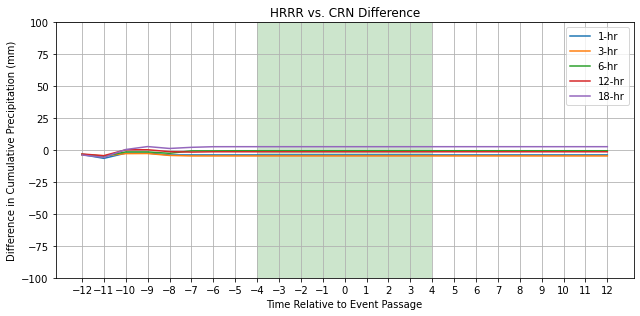

In [115]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_hol,label="1-hr")
plt.plot(hour,diff3_hol,label="3-hr")
plt.plot(hour,diff6_hol,label="6-hr")
plt.plot(hour,diff12_hol,label="12-hr")
plt.plot(hour,diff18_hol,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Newton, MS: 1100 UTC 5 April 2022-1100 UTC 6 April 2022</font>

In [116]:
#1 hr hrrr:
with open('hrrr_f01_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 8.745  9.012 39.737 43.41  43.804 45.149 45.298 45.298 45.298 45.298
 45.298 45.298 45.298 45.298 45.298 45.298 45.298 45.298 45.298 45.298
 45.298 45.298 45.309 45.31  45.31 ]


In [117]:
#Air Temp CRN:
with open('CRNH0203-2022-MS_Newton_5_ENE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2266:2291]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.4 11.9 14.8 16.6 19.3 20.4 20.4 20.4 20.4 20.4 20.4 20.4 20.4
 20.4 20.4 20.4 20.4 20.4 20.4 20.4 20.4 20.4 20.4 20.4]


In [118]:
difference_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_new.append(temp_i-temp_crn_i)

print(difference_new)

[8.745, 8.611999999999998, 27.837000000000003, 28.610000000000003, 27.204, 25.849, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.898, 24.909000000000002, 24.91, 24.91]


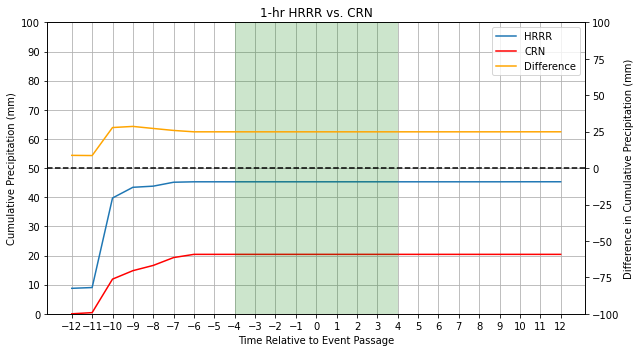

In [119]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_new, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [120]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [121]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonms1)

RSME 1-hr 48-hr HRRR vs CRN : 24.43959214062297


In [122]:
#3 hr hrrr:
with open('hrrr_f03_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2264:2289]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.203  1.751  6.504 58.871 59.041 59.041 59.125 59.125 59.125 59.125
 59.125 59.125 59.125 59.125 59.125 59.125 59.125 59.125 59.125 59.125
 59.125 59.125 59.126 59.126 59.126]


In [123]:
diff3_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_new.append(temp_i-temp_crn_i)

print(diff3_new)

[0.203, 1.351, -5.396, 44.071, 42.440999999999995, 39.741, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.724999999999994, 38.726, 38.726, 38.726]


In [124]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [125]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonms3)

RSME 3-hr 48-hr HRRR vs CRN : 36.795076332031165


In [126]:
#6 hr hrrr:
with open('hrrr_f06_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2261:2286]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 1.773  2.526  2.657 28.638 28.706 28.706 28.837 28.837 28.837 28.837
 28.837 28.837 28.837 28.837 28.837 28.837 28.837 28.837 28.837 28.837
 28.837 28.837 28.837 28.837 28.843]


In [127]:
diff6_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_new.append(temp_i-temp_crn_i)

print(diff6_new)

[1.773, 2.126, -9.243, 13.838000000000001, 12.106000000000002, 9.406000000000002, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.437000000000001, 8.443000000000001]


In [128]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [129]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonms6)

RSME 6-hr 48-hr HRRR vs CRN : 8.653767875324599


In [130]:
#12 hr hrrr:
with open('hrrr_f12_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2255:2280]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[4.0000e-03 6.5640e+00 1.3095e+01 3.3126e+01 3.5101e+01 3.7173e+01
 3.7236e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01
 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01
 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7280e+01 3.7282e+01
 3.7288e+01]
25


In [131]:
diff12_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_new.append(temp_i-temp_crn_i)

print(diff12_new)

[0.004, 6.163999999999999, 1.1949999999999985, 18.325999999999997, 18.500999999999998, 17.873, 16.836000000000002, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.88, 16.882, 16.888]


In [132]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [133]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonms12)

RSME 12-hr 48-hr HRRR vs CRN : 16.06188545221264


In [134]:
#18 hr hrrr:
with open('hrrr_f18_Newton_MS.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2249:2274]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.206  1.276 10.287 25.355 26.535 26.961 26.979 26.981 26.981 26.981
 26.981 26.981 26.981 26.981 26.981 26.981 26.981 26.981 26.981 26.981
 26.981 27.043 27.056 27.056 27.056]


In [135]:
diff18_new = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_new.append(temp_i-temp_crn_i)

print(diff18_new)

[0.206, 0.876, -1.6130000000000013, 10.554999999999996, 9.934999999999995, 7.660999999999994, 6.5789999999999935, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.580999999999992, 6.642999999999994, 6.655999999999995, 6.655999999999995, 6.655999999999995]


In [136]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [137]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonms18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonms18)

RSME 18-hr 48-hr HRRR vs CRN : 6.6298365108047665


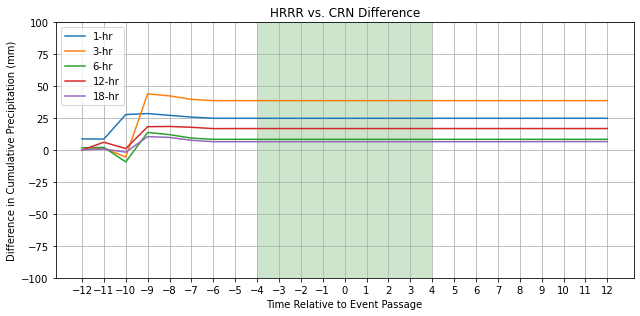

In [138]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_new,label="1-hr")
plt.plot(hour,diff3_new,label="3-hr")
plt.plot(hour,diff6_new,label="6-hr")
plt.plot(hour,diff12_new,label="12-hr")
plt.plot(hour,diff18_new,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gainesville, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [139]:
#1 hr hrrr:
with open('hrrr_f01_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 1.569  8.812  9.763 10.279 10.939 10.948 10.948 10.948 10.948 10.948
 10.948 10.948 10.948 10.948 10.948 10.949 10.949 10.949 10.949 10.949
 10.949 10.949 10.949 10.949 10.949]


In [140]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Gainesville_2_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2268:2293]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 3.9 20.3 21.6 21.8 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6
 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6 22.6]


In [141]:
difference_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_gai.append(temp_i-temp_crn_i)

print(difference_gai)

[-2.331, -11.487999999999996, -11.836999999999996, -11.520999999999995, -11.660999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.651999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996, -11.650999999999996]


In [142]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [143]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",gainesville1)

RSME 1-hr 48-hr HRRR vs CRN : 11.421705102129014


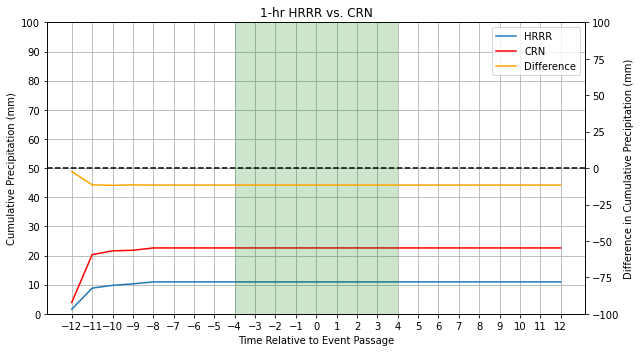

In [144]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_gai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [145]:
#3 hr hrrr:
with open('hrrr_f03_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 4.996 43.401 46.577 46.623 46.631 46.705 46.705 46.705 46.705 46.705
 46.705 46.705 46.705 46.705 46.705 46.705 46.705 46.705 46.705 46.705
 46.705 46.705 46.707 46.717 46.719]


In [146]:
diff3_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_gai.append(temp_i-temp_crn_i)

print(diff3_gai)

[1.0960000000000005, 23.101000000000006, 24.977000000000007, 24.823000000000008, 24.03100000000001, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.105000000000008, 24.10700000000001, 24.117000000000008, 24.11900000000001]


In [147]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [148]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",gainesville3)

RSME 3-hr 48-hr HRRR vs CRN : 23.642968476906624


In [149]:
#6 hr hrrr:
with open('hrrr_f06_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 5.466  7.201 22.127 22.148 22.276 22.598 22.598 22.598 22.598 22.598
 22.598 22.598 22.598 22.598 22.598 22.598 22.598 22.598 22.598 22.598
 22.598 22.598 22.598 22.598 22.598]


In [150]:
diff6_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_gai.append(temp_i-temp_crn_i)

print(diff6_gai)

[1.5660000000000003, -13.098999999999997, 0.5270000000000046, 0.3480000000000061, -0.3239999999999945, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339, -0.001999999999995339]


In [151]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [152]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",gainesville6)

RSME 6-hr 48-hr HRRR vs CRN : 2.6422720980247276


In [153]:
#12 hr hrrr:
with open('hrrr_f12_Gainesville_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2257:2282]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 2.792 36.023 39.551 42.521 43.234 43.678 43.678 43.678 43.678 43.678
 43.678 43.678 43.678 43.678 43.678 43.678 43.678 43.678 43.678 43.678
 43.682 43.682 43.682 43.682 43.682]
25


In [154]:
diff12_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_gai.append(temp_i-temp_crn_i)

print(diff12_gai)

[-1.108, 15.723000000000006, 17.951000000000004, 20.721000000000004, 20.634000000000004, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.078000000000007, 21.082000000000004, 21.082000000000004, 21.082000000000004, 21.082000000000004, 21.082000000000004]


In [155]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [156]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",gainesville12)

RSME 12-hr 48-hr HRRR vs CRN : 20.30988475693548


In [157]:
#18 hr hrrr:
with open('hrrr_f18_Gainesville_AL (1).txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2251:2276]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.952 35.72  44.05  44.122 44.284 44.289 44.339 44.339 44.339 44.339
 44.339 44.339 44.339 44.339 44.339 44.339 44.339 44.339 44.339 44.339
 44.339 44.339 44.346 44.35  44.35 ]


In [158]:
diff18_gai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_gai.append(temp_i-temp_crn_i)

print(diff18_gai)

[-2.948, 15.420000000000002, 22.45, 22.322000000000003, 21.684, 21.689000000000004, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.739, 21.746, 21.749999999999996, 21.749999999999996]


In [159]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [160]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
gainesville18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",gainesville18)

RSME 18-hr 48-hr HRRR vs CRN : 21.137369104976145


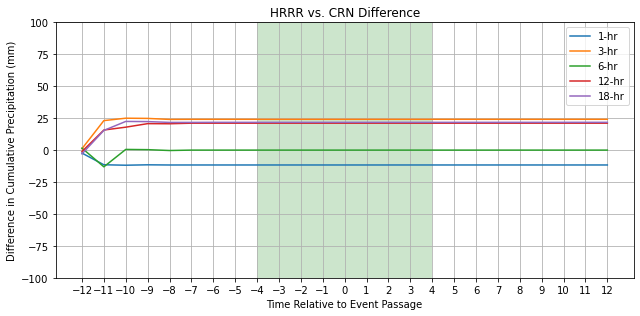

In [161]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_gai,label="1-hr")
plt.plot(hour,diff3_gai,label="3-hr")
plt.plot(hour,diff6_gai,label="6-hr")
plt.plot(hour,diff12_gai,label="12-hr")
plt.plot(hour,diff18_gai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Fairhope, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [162]:
#1 hr hrrr:
with open('hrrr_f01_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.058  0.295  0.297  0.344  0.568 28.831 33.109 34.805 37.677 37.681
 37.682 37.682 37.73  38.18  38.377 38.572 38.576 38.576 38.576 38.576
 38.576 38.576 38.576 38.576 38.576]


In [163]:
#Air Temp CRN:
with open('CRNH0203-2022-AL_Fairhope_3_NE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2268:2293]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   0.   0.   0.  26.1 34.9 41.9 41.9 41.9 41.9 41.9 41.9 41.9
 41.9 41.9 41.9 41.9 41.9 41.9 41.9 41.9 41.9 41.9 41.9]


In [164]:
difference_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_fai.append(temp_i-temp_crn_i)

print(difference_fai)

[0.058, 0.295, 0.297, 0.344, 0.568, 2.7310000000000016, -1.791000000000004, -7.095000000000006, -4.223000000000006, -4.219000000000008, -4.218000000000011, -4.218000000000011, -4.170000000000009, -3.720000000000006, -3.5230000000000032, -3.328000000000003, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005, -3.324000000000005]


In [165]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [166]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",fairhope1)

RSME 1-hr 48-hr HRRR vs CRN : 3.38819456348068


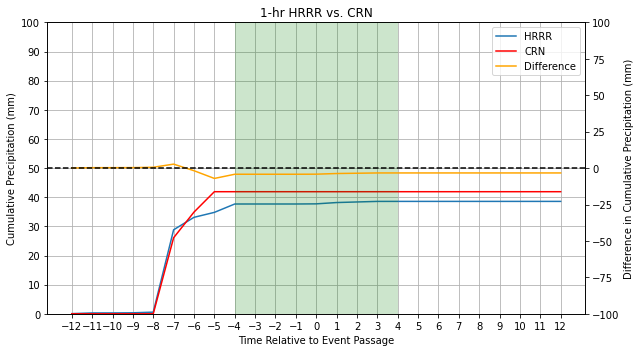

In [167]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_fai, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [168]:
#3 hr hrrr:
with open('hrrr_f03_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.014  0.416  0.416  0.416  0.417  0.424  8.176  9.3    9.958  9.958
  9.958  9.958  9.959 10.035 10.041 10.131 10.227 10.261 10.263 10.267
 10.27  10.341 10.341 10.341 10.341]


In [169]:
diff3_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_fai.append(temp_i-temp_crn_i)

print(diff3_fai)

[0.014, 0.41600000000000004, 0.41600000000000004, 0.41600000000000004, 0.41700000000000004, -25.676000000000002, -26.724000000000004, -32.60000000000001, -31.942000000000007, -31.942000000000007, -31.942000000000007, -31.942000000000007, -31.941000000000006, -31.865000000000006, -31.859000000000005, -31.769000000000005, -31.673000000000005, -31.639000000000003, -31.637000000000004, -31.633000000000003, -31.630000000000003, -31.559000000000005, -31.559000000000005, -31.559000000000005, -31.559000000000005]


In [170]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [171]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",fairhope3)

RSME 3-hr 48-hr HRRR vs CRN : 27.97714019766853


In [172]:
#6 hr hrrr:
with open('hrrr_f06_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.051 0.155 0.155 0.155 0.171 1.016 2.138 2.189 2.218 2.218
 2.292 2.315 2.337 2.337 2.359 2.371 2.371 2.395 2.395 2.395 2.395 2.395
 2.433]


In [173]:
diff6_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_fai.append(temp_i-temp_crn_i)

print(diff6_fai)

[0.0, 0.0, 0.051, 0.155, 0.155, -25.945, -34.729000000000006, -40.88400000000001, -39.76200000000001, -39.711000000000006, -39.682, -39.682, -39.608000000000004, -39.58500000000001, -39.563, -39.563, -39.541000000000004, -39.529, -39.529, -39.50500000000001, -39.50500000000001, -39.50500000000001, -39.50500000000001, -39.50500000000001, -39.467000000000006]


In [174]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [175]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",fairhope6)

RSME 6-hr 48-hr HRRR vs CRN : 34.74119882214775


In [176]:
#12 hr hrrr:
with open('hrrr_f12_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2257:2282]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.083  0.085  0.085  0.091  3.574  7.085  7.546
  7.818 26.055 26.055 26.055 26.056 26.056 26.056 26.058 26.075 26.078
 26.079 26.084 26.101 26.111 26.111]
25


In [177]:
diff12_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_fai.append(temp_i-temp_crn_i)

print(diff12_fai)

[0.0, 0.0, 0.0, 0.083, 0.085, -26.015, -34.809000000000005, -38.32600000000001, -34.815000000000005, -34.354000000000006, -34.08200000000001, -15.845000000000006, -15.845000000000006, -15.845000000000006, -15.844000000000005, -15.844000000000005, -15.844000000000005, -15.842000000000006, -15.825000000000006, -15.822000000000006, -15.821000000000005, -15.816000000000006, -15.799000000000007, -15.789000000000005, -15.789000000000005]


In [178]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [179]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",fairhope12)

RSME 12-hr 48-hr HRRR vs CRN : 20.413598464748937


In [180]:
#18 hr hrrr:
with open('hrrr_f18_Fairhope_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2251:2276]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.135  0.136  0.143 12.485 34.745 36.796 52.58  53.211
 53.211 53.914 53.914 54.098 54.098 54.098 54.098 54.098 54.098 54.098
 54.098 54.098 54.098 54.136 54.137]


In [181]:
diff18_fai = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_fai.append(temp_i-temp_crn_i)

print(diff18_fai)

[0.0, 0.0, 0.135, 0.136, 0.14300000000000002, -13.615, -0.15500000000000114, -5.103999999999999, 10.68, 11.311, 11.311, 12.014000000000003, 12.014000000000003, 12.198, 12.198, 12.198, 12.198, 12.198, 12.198, 12.198, 12.198, 12.198, 12.198, 12.235999999999997, 12.236999999999995]


In [182]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [183]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
fairhope18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",fairhope18)

RSME 18-hr 48-hr HRRR vs CRN : 10.310166584493192


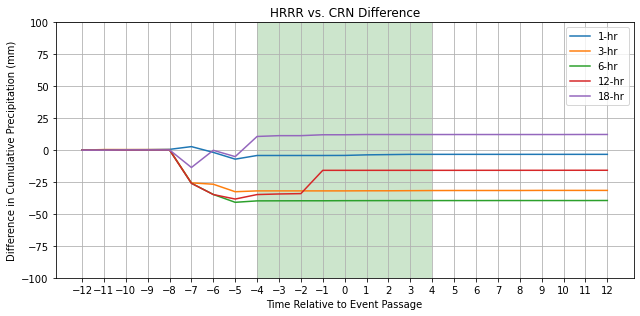

In [184]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_fai,label="1-hr")
plt.plot(hour,diff3_fai,label="3-hr")
plt.plot(hour,diff6_fai,label="6-hr")
plt.plot(hour,diff12_fai,label="12-hr")
plt.plot(hour,diff18_fai,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Selma, AL: 1300 UTC 5 April 2022-1300 UTC 6 April 2022</font>

In [185]:
#1 hr hrrr:
with open('hrrr_f01_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    temp=np.cumsum(temp)
    
#Air Temp CRN:
with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2268:2293]
    temp_crn=np.cumsum(temp_crn)
    print(temp)
    print(len(temp))
    print(temp_crn)
    print(len(temp_crn))
#full time period is [2015:2112]
difference_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_sel.append(temp_i-temp_crn_i)

print(difference_sel)
print(len(difference_sel))

[ 0.423  9.087 15.772 24.39  27.81  29.514 30.762 30.763 30.763 30.764
 30.768 30.768 30.768 30.768 30.768 30.768 30.768 30.768 30.768 30.768
 30.768 30.772 30.772 30.776 30.784]
25
[17.4 28.1 40.8 44.4 47.6 48.5 48.8 48.8 48.8 48.8 48.8 48.8 48.8 48.8
 48.8 48.8 48.8 48.8 48.8 48.8 48.8 48.8 48.8 48.8 49. ]
25
[-16.977, -19.012999999999998, -25.028, -20.009999999999998, -19.79, -18.985999999999997, -18.037999999999993, -18.036999999999992, -18.036999999999992, -18.03599999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.03199999999999, -18.027999999999988, -18.027999999999988, -18.023999999999987, -18.21599999999999]
25


In [186]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# difference_sel[17]=None
# difference_sel[18]=None
# difference_sel[19]=None
# difference_sel[20]=None
# print(temp)
# print(temp_crn)
# print(difference_sel)


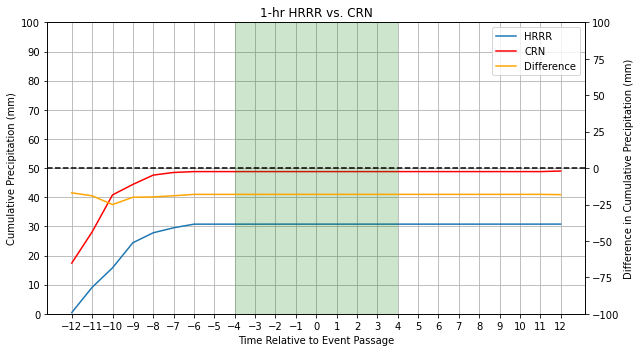

In [187]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_sel, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [188]:
#3 hr hrrr:
with open('hrrr_f03_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2266:2291]
    temp=np.cumsum(temp)

# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

    print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff3_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_sel.append(temp_i-temp_crn_i)

print(diff3_sel)
print(len(diff3_sel))

[11.153 16.362 40.741 60.356 76.419 76.689 76.789 76.789 76.789 76.801
 76.801 76.801 76.801 76.801 76.801 76.801 76.801 76.801 76.801 76.802
 76.802 76.871 76.872 76.894 76.895]
[-6.246999999999998, -11.737999999999996, -0.0589999999999975, 15.955999999999996, 28.818999999999996, 28.188999999999993, 27.98899999999999, 27.98899999999999, 27.98899999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.00099999999999, 28.001999999999995, 28.001999999999995, 28.070999999999998, 28.072000000000003, 28.09400000000001, 27.89500000000001]
25


In [189]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff3_sel[17]=None
# diff3_sel[18]=None
# diff3_sel[19]=None
# diff3_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff3_sel)

In [190]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [191]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",selma3)

In [192]:
#6 hr hrrr:
with open('hrrr_f06_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2263:2288]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]
print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff6_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_sel.append(temp_i-temp_crn_i)

print(diff6_sel)
print(len(diff6_sel))

[3.0000e-03 4.6750e+00 2.8268e+01 3.9824e+01 5.9757e+01 6.3072e+01
 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01
 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01 6.4415e+01
 6.4415e+01 6.4415e+01 6.4416e+01 6.4510e+01 6.4752e+01 6.4832e+01
 6.4870e+01]
[-17.397, -23.424999999999997, -12.531999999999996, -4.5760000000000005, 12.156999999999996, 14.571999999999996, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.614999999999995, 15.616, 15.709999999999994, 15.951999999999998, 16.031999999999996, 15.86999999999999]
25


In [193]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff6_sel[17]=None
# diff6_sel[18]=None
# diff6_sel[19]=None
# diff6_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff6_sel)

In [194]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [195]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",selma6)

In [196]:
#12 hr hrrr:
with open('hrrr_f12_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2257:2282]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff12_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_sel.append(temp_i-temp_crn_i)

print(diff12_sel)
print(len(diff12_sel))

[0.0000e+00 0.0000e+00 6.3000e-02 3.2832e+01 5.2113e+01 6.1267e+01
 6.5530e+01 6.5629e+01 6.5679e+01 6.5679e+01 6.5679e+01 6.5679e+01
 6.5679e+01 6.5679e+01 6.5679e+01 6.5679e+01 6.5679e+01 6.5679e+01
 6.5679e+01 6.5679e+01 6.5679e+01 6.5679e+01 6.5686e+01 6.5686e+01
 6.5686e+01]
[-17.4, -28.099999999999998, -40.736999999999995, -11.567999999999998, 4.512999999999998, 12.766999999999996, 16.730000000000004, 16.829000000000008, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.879000000000005, 16.88600000000001, 16.88600000000001, 16.686000000000007]
25


In [197]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff12_sel[17]=None
# diff12_sel[18]=None
# diff12_sel[19]=None
# diff12_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff12_sel)

In [198]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [199]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [200]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",selma12)

In [201]:
#18 hr hrrr:
with open('hrrr_f18_Selma_AL.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2251:2276]
    temp=np.cumsum(temp)
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Selma_13_WNW.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[1941:1966]

print(temp)
#     print(len(temp))
#     print(temp_crn)
#     print(len(temp_crn))
#full time period is [2015:2112]
diff18_sel = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_sel.append(temp_i-temp_crn_i)

print(diff18_sel)
print(len(diff18_sel))

[1.4000e-02 2.3000e-02 3.0700e+00 2.2610e+01 4.2002e+01 4.4284e+01
 4.6054e+01 4.6471e+01 4.6481e+01 4.6502e+01 4.6502e+01 4.6502e+01
 4.6502e+01 4.6502e+01 4.6502e+01 4.6502e+01 4.6502e+01 4.6502e+01
 4.6506e+01 4.6506e+01 4.6506e+01 4.6506e+01 4.6529e+01 4.6529e+01
 4.6541e+01]
[-17.386, -28.076999999999998, -37.73, -21.79, -5.598000000000006, -4.216000000000008, -2.746000000000002, -2.3290000000000006, -2.3190000000000026, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.298000000000002, -2.294000000000004, -2.294000000000004, -2.294000000000004, -2.294000000000004, -2.271000000000001, -2.271000000000001, -2.459000000000003]
25


In [202]:
# temp[17]=None
# temp[18]=None
# temp[19]=None
# temp[20]=None

# temp_crn[17]=None
# temp_crn[18]=None
# temp_crn[19]=None
# temp_crn[20]=None

# diff18_sel[17]=None
# diff18_sel[18]=None
# diff18_sel[19]=None
# diff18_sel[20]=None
# print(temp)
# print(temp_crn)
# print(diff18_sel)

In [203]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-6, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 6, color='green', alpha=0.2, lw=0)
# plt.axvspan(6, 14, color='y', alpha=0.2, lw=0)
# plt.show()

In [204]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# selma18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",selma18)

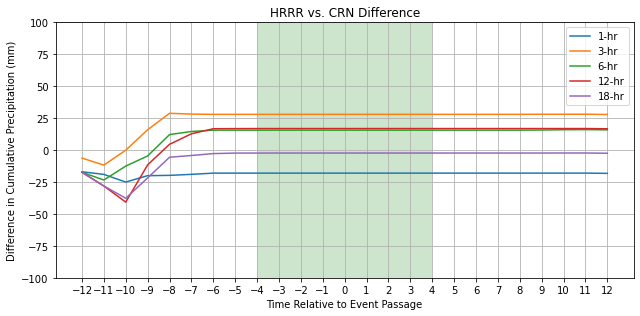

In [205]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sel,label="1-hr")
plt.plot(hour,diff3_sel,label="3-hr")
plt.plot(hour,diff6_sel,label="6-hr")
plt.plot(hour,diff12_sel,label="12-hr")
plt.plot(hour,diff18_sel,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Bowling Green, KY: 1500 UTC 5 April 2022-1500 UTC 6 April 2022</font>

In [206]:
#1 hr hrrr:
with open('hrrr_f01_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2270:2295]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.042  0.45   0.972  1.887  3.385  6.123  6.907  7.438  7.438  7.438
  7.438  7.438  7.438  7.438  7.438  7.438  7.438  7.438  7.438  7.438
  7.438  7.597  9.013 10.68  12.391]


In [207]:
# hour=[]
# for i in range(-8,17,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

In [208]:
#Air Temp CRN:
with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2270:2295]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   1.   1.6  2.6  5.4  8.2  8.7  9.1  9.1  9.1  9.1  9.1  9.1  9.1
  9.1  9.1  9.1  9.1  9.1  9.1  9.1  9.7 14.8 18.2 19.7]


In [209]:
difference_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_bow.append(temp_i-temp_crn_i)

print(difference_bow)

[0.042, -0.55, -0.6280000000000001, -0.7130000000000001, -2.0150000000000006, -2.077, -1.7930000000000001, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -1.6620000000000008, -2.1030000000000006, -5.787000000000001, -7.520000000000001, -7.309000000000001]


In [210]:
# temp[6]=None
# temp_crn[6]=None
# difference_bow[6]=None

# print(temp)
# print(temp_crn)
# print(difference_bow)

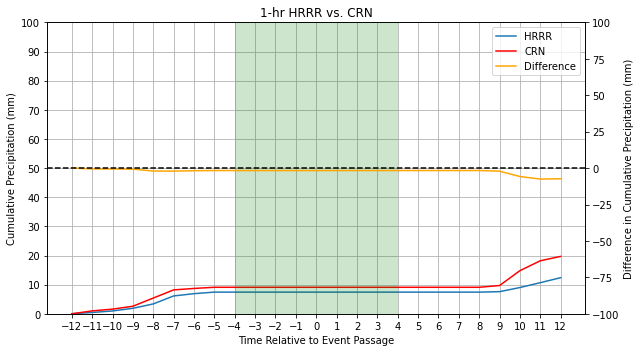

In [211]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_bow, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [212]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [213]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",bowling1)

In [214]:
#3 hr hrrr:
with open('hrrr_f03_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[ 0.06   0.437  1.085  1.743  5.176  7.175  7.651  8.169  8.169  8.177
  8.177  8.177  8.177  8.177  8.177  8.177  8.177  8.177  8.177  8.177
  8.177  8.182  9.272 10.697 11.341]


In [215]:
diff3_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_bow.append(temp_i-temp_crn_i)

print(diff3_bow)

[0.06, -0.563, -0.5150000000000001, -0.8570000000000002, -0.2240000000000002, -1.0249999999999986, -1.0489999999999986, -0.9309999999999992, -0.9309999999999992, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -0.923, -1.517999999999999, -5.527999999999999, -7.502999999999998, -8.358999999999998]


In [216]:
# temp[6]=None
# temp_crn[6]=None
# diff3_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff3_bow)

In [217]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [218]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",bowling3)

In [219]:
#6 hr hrrr:
with open('hrrr_f06_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2265:2290]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[ 0.109  0.127  0.216  0.47   3.708  7.675 10.449 10.485 10.547 10.547
 10.547 10.547 10.58  10.581 10.581 10.581 10.581 10.581 10.581 10.581
 10.581 10.6   11.071 13.581 20.357]


In [220]:
diff6_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_bow.append(temp_i-temp_crn_i)

print(diff6_bow)

[0.109, -0.873, -1.3840000000000001, -2.13, -1.6920000000000002, -0.5249999999999986, 1.7490000000000023, 1.3850000000000016, 1.447000000000001, 1.447000000000001, 1.447000000000001, 1.447000000000001, 1.4800000000000004, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 1.4809999999999999, 0.9000000000000004, -3.728999999999999, -4.619, 0.657]


In [221]:
# temp[6]=None
# temp_crn[6]=None
# diff6_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff6_bow)

In [222]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [223]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",bowling6)

In [224]:
#12 hr hrrr:
with open('hrrr_f12_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2259:2284]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
# #full time period is [2015:2112]

[1.9000e-02 9.8000e-02 1.2800e-01 8.1200e-01 1.7120e+00 2.0660e+00
 2.5290e+00 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00
 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00
 2.5310e+00 2.5310e+00 2.5310e+00 2.5310e+00 3.9620e+00 1.5843e+01
 2.2046e+01]
25


In [225]:
diff12_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_bow.append(temp_i-temp_crn_i)

print(diff12_bow)

[0.019, -0.902, -1.472, -1.788, -3.688, -6.133999999999999, -6.170999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -6.568999999999999, -7.168999999999999, -10.838, -2.3569999999999993, 2.346]


In [226]:
# temp[6]=None
# temp_crn[6]=None
# diff12_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff12_bow)

In [227]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [228]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",bowling12)

In [229]:
#18 hr hrrr:
with open('hrrr_f18_Bowling Green_KY.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2253:2278]
    temp=np.cumsum(temp)
    print(temp)
# with open('CRNH0203-2022-KY_Bowling_Green_21_NNE.txt') as f:
#     lst=[line.split()[9] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2136:2161]
#     print(temp_crn)
#     #print(len(temp))
# #full time period is [2015:2112]

[ 0.092  0.301  0.481  2.264  4.154  6.548  7.682  8.758  8.758  8.758
  8.758  8.758  8.758  8.758  8.758  8.758  8.758  8.758  8.758  8.758
  8.758  8.759  9.032 14.009 16.54 ]


In [230]:
diff18_bow = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_bow.append(temp_i-temp_crn_i)

print(diff18_bow)

[0.092, -0.6990000000000001, -1.1190000000000002, -0.3360000000000003, -1.2460000000000004, -1.6519999999999992, -1.017999999999999, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.34199999999999875, -0.940999999999999, -5.767999999999999, -4.190999999999999, -3.16]


In [231]:
# temp[6]=None
# temp_crn[6]=None
# diff18_bow[6]=None

# print(temp)
# print(temp_crn)
# print(diff18_bow)

In [232]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [233]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# bowling18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",bowling18)

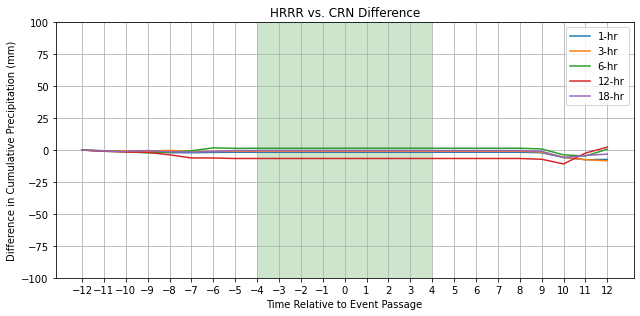

In [234]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_bow,label="1-hr")
plt.plot(hour,diff3_bow,label="3-hr")
plt.plot(hour,diff6_bow,label="6-hr")
plt.plot(hour,diff12_bow,label="12-hr")
plt.plot(hour,diff18_bow,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

<font size="3">Gadsden, AL: 0200 UTC 31 March 2022-0200 UTC 1 April 2022</font>

In [235]:
# #1 hr hrrr:
# with open('hrrr_f01_Gadsden_AL.txt') as f:
#     lst=[line.split()[2] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[2137:2162]
#     temp=np.cumsum(temp)
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [236]:
# #Air Temp CRN:
# with open('CRNH0203-2022-AL_Gadsden_19_N.txt') as f:
#     lst=[line.split()[12] for line in f]
#     #print(lst)
#     temp_crn=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp_crn.append(new)
#     temp_crn=[float(x) for x in temp_crn]
#     temp_crn=temp_crn[2137:2162]
#     temp_crn=np.cumsum(temp_crn)
#     #temp_crn=np.cumsum(temp_crn)
#     print(temp_crn)
#     #print(len(temp_crn))
#     # print(temp_crn[2124])

In [237]:
# difference_gad = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference_gad.append(temp_i-temp_crn_i)

# print(difference_gad)

In [238]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [239]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden1 = math.sqrt(MSE)
# print("RSME 1-hr 48-hr HRRR vs CRN :",gadsden1)

In [240]:
# plt.rcParams["figure.figsize"] = [9, 5]
# plt.rcParams["figure.autolayout"] = True

# ax1 = plt.subplot()
# plt.grid()
# ax1.grid(True, which='both')
# l1, = ax1.plot(hour,temp)
# l3, = ax1.plot(hour,temp_crn, color='red')
# ax1.set_ylim(8, 26)
# plt.yticks(np.arange(8,27,1.5))
# ax2 = ax1.twinx()
# l2, = ax2.plot(hour,difference_gad, color='orange')
# ax2.set_ylim(-10, 10)
# plt.axhline(y=0, color='black', linestyle='dashed')
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #ax2.yticks(np.arange(-6, 11, 2.0))
# plt.title("1-hr HRRR vs. CRN")
# plt.ylabel("Difference")
# ax1.set_ylabel("Air Temperature (C)")
# ax1.set_xlabel("UTC Hour")

# plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

# plt.show()

In [241]:
# #3 hr hrrr:
# with open('hrrr_f03_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1942:1967]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [242]:
# difference3 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference3.append(temp_i-temp_crn_i)

# print(difference3)

In [243]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [244]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden3 = math.sqrt(MSE)
# print("RSME 3-hr 48-hr HRRR vs CRN :",gadsden3)

In [245]:
# #6 hr hrrr:
# with open('hrrr_f06_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1939:1964]
#     #temp=temp[2015:2063]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [246]:
# difference6 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference6.append(temp_i-temp_crn_i)

# print(difference6)

In [247]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [248]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden6 = math.sqrt(MSE)
# print("RSME 6-hr 48-hr HRRR vs CRN :",gadsden6)

In [249]:
# #12 hr hrrr:
# with open('hrrr_f12_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     temp=temp[1933:1958]
#     #temp=temp[2015:2063]
#     print(temp)
#     print(len(temp))
# #full time period is [2015:2112]

In [250]:
# difference12 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference12.append(temp_i-temp_crn_i)

# print(difference12)

In [251]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [252]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden12 = math.sqrt(MSE)
# print("RSME 12-hr 48-hr HRRR vs CRN :",gadsden12)

In [253]:
# #18 hr hrrr:
# with open('hrrr_f18_Gadsden_AL.txt') as f:
#     lst=[line.split()[1] for line in f]
#     temp=[]
#     for i in lst:
#         new=i.replace(',',"")
#         temp.append(new)
#     temp.pop(0)
#     temp=[float(x) for x in temp]
#     #print(temp.index(6.91541))
#     temp=temp[1927:1952]
#     print(temp)
#     #print(len(temp))
# #full time period is [2015:2112]

In [254]:
# difference18 = []

# zip_object = zip(temp, temp_crn)
# for temp_i, temp_crn_i in zip_object:
#     difference18.append(temp_i-temp_crn_i)

# print(difference18)

In [255]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [256]:
# MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
# gadsden18 = math.sqrt(MSE)
# print("RSME 18-hr 48-hr HRRR vs CRN :",gadsden18)

In [257]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference_gad,label="1-hr")
# plt.plot(hour,difference3,label="3-hr")
# plt.plot(hour,difference6,label="6-hr")
# plt.plot(hour,difference12,label="12-hr")
# plt.plot(hour,difference18,label="18-hr")
# plt.yticks(np.arange(-10, 11, 2.0))
# plt.ylim(-10, 10)
# plt.title("HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temperature (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# #plt.grid(axis='y')
# plt.grid()
# plt.legend()
# plt.show()

<font size="3">Newton, GA: 1800 UTC 5 April 2022-1800 UTC 6 April 2022</font>

In [258]:
#1 hr hrrr:
with open('hrrr_f01_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2273:2298]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.022  6.957 10.791 11.464 20.176 20.799 20.799 20.799
 20.799 20.799 20.799 20.799 20.799 20.799 20.799 20.799 20.799 20.799
 20.799 20.799 20.799 20.799 20.804]


In [259]:
#Air Temp CRN:
with open('CRNH0203-2022-GA_Newton_11_SW.txt') as f:
    lst=[line.split()[12] for line in f]
    #print(lst)
    temp_crn=[]
    for i in lst:
        new=i.replace(',',"")
        temp_crn.append(new)
    temp_crn=[float(x) for x in temp_crn]
    temp_crn=temp_crn[2273:2298]
    temp_crn=np.cumsum(temp_crn)
    print(temp_crn)
    #print(len(temp_crn))
    # print(temp_crn[2124])

[ 0.   0.   1.8 26.6 33.7 35.4 38.4 38.7 38.7 38.7 38.7 38.7 38.7 38.7
 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7 38.7]


In [260]:
difference_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    difference_newt.append(temp_i-temp_crn_i)

print(difference_newt)

[0.0, 0.0, -1.778, -19.643, -22.909000000000002, -23.936000000000007, -18.224000000000004, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.901, -17.896]


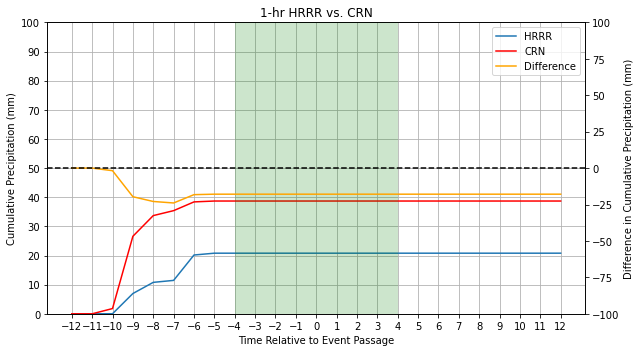

In [261]:
plt.rcParams["figure.figsize"] = [9, 5]
plt.rcParams["figure.autolayout"] = True

ax1 = plt.subplot()
plt.grid()
ax1.grid(True, which='both')
l1, = ax1.plot(hour,temp)
l3, = ax1.plot(hour,temp_crn, color='red')
ax1.set_ylim(0, 100)
plt.yticks(np.arange(0,110,10))
ax2 = ax1.twinx()
l2, = ax2.plot(hour,difference_newt, color='orange')
ax2.set_ylim(-100, 100)
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#ax2.yticks(np.arange(-6, 11, 2.0))
plt.title("1-hr HRRR vs. CRN")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
ax1.set_ylabel("Cumulative Precipitation (mm)")
ax1.set_xlabel("Time Relative to Event Passage")

plt.legend([l1, l3,l2], ["HRRR", "CRN","Difference"])

plt.show()

In [262]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("1-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [263]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga1 = math.sqrt(MSE)
print("RSME 1-hr 48-hr HRRR vs CRN :",newtonga1)

RSME 1-hr 48-hr HRRR vs CRN : 17.42035903074331


In [264]:
#3 hr hrrr:
with open('hrrr_f03_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2271:2296]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.027  0.05  17.895 18.116 19.067 23.831 23.831 23.833
 23.833 23.835 23.846 23.86  24.015 24.018 24.018 24.018 24.048 24.048
 24.048 24.048 24.048 24.048 24.048]


In [265]:
diff3_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff3_newt.append(temp_i-temp_crn_i)

print(diff3_newt)

[0.0, 0.0, -1.7730000000000001, -26.55, -15.805000000000003, -17.284000000000006, -19.333000000000006, -14.869000000000003, -14.869000000000003, -14.867000000000004, -14.867000000000004, -14.865000000000006, -14.854000000000006, -14.840000000000007, -14.685000000000006, -14.682000000000006, -14.682000000000006, -14.682000000000006, -14.652000000000005, -14.652000000000005, -14.652000000000005, -14.652000000000005, -14.652000000000005, -14.652000000000005, -14.652000000000005]


In [266]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("3-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [267]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga3 = math.sqrt(MSE)
print("RSME 3-hr 48-hr HRRR vs CRN :",newtonga3)

RSME 3-hr 48-hr HRRR vs CRN : 14.888264861964277


In [268]:
#6 hr hrrr:
with open('hrrr_f06_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2268:2293]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.0000e+00 0.0000e+00 0.0000e+00 1.1000e-02 2.9498e+01 3.1475e+01
 3.2889e+01 3.2889e+01 3.2889e+01 3.2889e+01 3.2889e+01 3.2889e+01
 3.2889e+01 3.3699e+01 3.3704e+01 3.3704e+01 3.3704e+01 3.3704e+01
 3.3704e+01 3.3704e+01 3.3704e+01 3.3704e+01 3.3705e+01 3.3705e+01
 3.3705e+01]


In [269]:
diff6_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff6_newt.append(temp_i-temp_crn_i)

print(diff6_newt)

[0.0, 0.0, -1.8, -26.589000000000002, -4.202000000000005, -3.925000000000008, -5.51100000000001, -5.811000000000007, -5.811000000000007, -5.811000000000007, -5.811000000000007, -5.811000000000007, -5.811000000000007, -5.001000000000005, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.996000000000002, -4.9950000000000045, -4.9950000000000045, -4.9950000000000045]


In [270]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("6-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [271]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga6 = math.sqrt(MSE)
print("RSME 6-hr 48-hr HRRR vs CRN :",newtonga6)

RSME 6-hr 48-hr HRRR vs CRN : 7.143654529720767


In [272]:
#12 hr hrrr:
with open('hrrr_f12_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    temp=temp[2262:2287]
    temp=np.cumsum(temp)
    #temp=temp[2015:2063]
    print(temp)
    print(len(temp))
#full time period is [2015:2112]

[ 0.     0.     0.     0.091  4.352  8.26   8.961 10.214 10.226 10.226
 10.594 10.594 10.651 10.651 10.652 10.652 10.656 10.656 10.656 10.656
 10.656 10.656 10.656 10.656 11.717]
25


In [273]:
diff12_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff12_newt.append(temp_i-temp_crn_i)

print(diff12_newt)

[0.0, 0.0, -1.8, -26.509, -29.348000000000003, -27.140000000000008, -29.439000000000007, -28.486000000000004, -28.474000000000004, -28.474000000000004, -28.106, -28.106, -28.049, -28.049, -28.048000000000002, -28.048000000000002, -28.044000000000004, -28.044000000000004, -28.044000000000004, -28.044000000000004, -28.044000000000004, -28.044000000000004, -28.044000000000004, -28.044000000000004, -26.983000000000004]


In [274]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("12-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [275]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga12 = math.sqrt(MSE)
print("RSME 12-hr 48-hr HRRR vs CRN :",newtonga12)

RSME 12-hr 48-hr HRRR vs CRN : 26.343935706723858


In [276]:
#18 hr hrrr:
with open('hrrr_f18_Newton_GA.txt') as f:
    lst=[line.split()[2] for line in f]
    temp=[]
    for i in lst:
        new=i.replace(',',"")
        temp.append(new)
    temp.pop(0)
    temp=[float(x) for x in temp]
    #print(temp.index(6.91541))
    temp=temp[2256:2281]
    temp=np.cumsum(temp)
    print(temp)
    #print(len(temp))
#full time period is [2015:2112]

[0.    0.    0.    0.067 4.915 6.025 6.134 6.281 6.281 6.968 6.968 7.139
 7.166 7.788 8.054 8.13  8.157 8.161 8.162 8.163 8.163 8.163 8.178 8.179
 8.67 ]


In [277]:
diff18_newt = []

zip_object = zip(temp, temp_crn)
for temp_i, temp_crn_i in zip_object:
    diff18_newt.append(temp_i-temp_crn_i)

print(diff18_newt)

[0.0, 0.0, -1.8, -26.533, -28.785000000000004, -29.375000000000007, -32.266000000000005, -32.419000000000004, -32.419000000000004, -31.732000000000003, -31.732000000000003, -31.561, -31.534000000000002, -30.912000000000003, -30.646, -30.57, -30.543, -30.539, -30.538000000000004, -30.537000000000003, -30.537000000000003, -30.537000000000003, -30.522000000000002, -30.521, -30.03]


In [278]:
# #plot 1-hr:
# plt.rcParams["figure.figsize"] = [9.00, 4.50]
# plt.rcParams["figure.autolayout"] = True
# #default_x_ticks= range(len(hour))
# # plt.plot(hour,temp,label="HRRR")
# # plt.plot(hour,temp_crn,label="CRN")
# plt.plot(hour,difference,color="black",label="Difference")
# #plt.xticks(default_x_ticks,hour)
# plt.title("18-hr HRRR vs. CRN Difference")
# plt.xlabel("UTC Hour")
# plt.ylabel("Air Temp (C)")
# plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
# plt.axvspan(-8, 0, color='red', alpha=0.2, lw=0)
# plt.axvspan(0, 8, color='green', alpha=0.2, lw=0)
# plt.axvspan(8, 16, color='y', alpha=0.2, lw=0)
# plt.show()

In [279]:
MSE = np.square(np.subtract(temp_crn,temp)).mean() 
 
newtonga18 = math.sqrt(MSE)
print("RSME 18-hr 48-hr HRRR vs CRN :",newtonga18)

RSME 18-hr 48-hr HRRR vs CRN : 28.79992572768201


In [280]:
# hour=[]
# for i in range(-12,13,1):
#     hour.append(i)
#     i+=1
# print(len(hour))

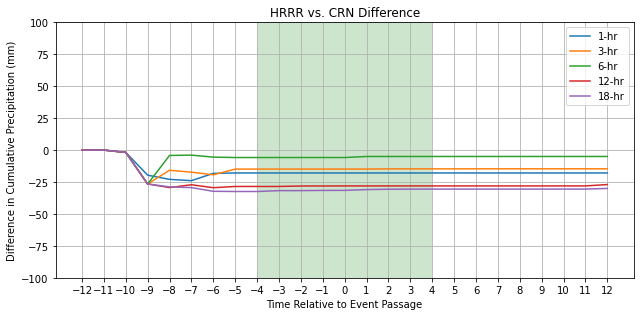

In [281]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [9.00, 4.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_newt,label="1-hr")
plt.plot(hour,diff3_newt,label="3-hr")
plt.plot(hour,diff6_newt,label="6-hr")
plt.plot(hour,diff12_newt,label="12-hr")
plt.plot(hour,diff18_newt,label="18-hr")
#plt.yticks(np.arange(-80,80,20))
plt.ylim(-100, 100)
plt.title("HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend()
plt.show()

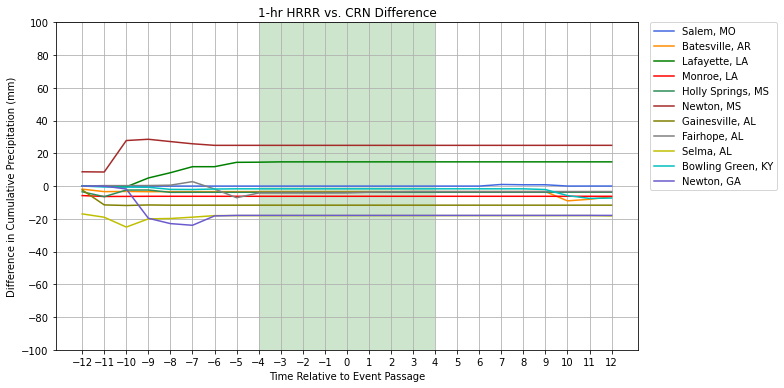

In [282]:
#plot 1-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,difference_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,difference_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,difference_laf,c='g',label="Lafayette, LA")
plt.plot(hour,difference_mon,c='r',label="Monroe, LA")
plt.plot(hour,difference_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,difference_new,c='brown',label="Newton, MS")
plt.plot(hour,difference_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,difference_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,difference_sel,c='y',label="Selma, AL")
plt.plot(hour,difference_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,difference_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,difference_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("1-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

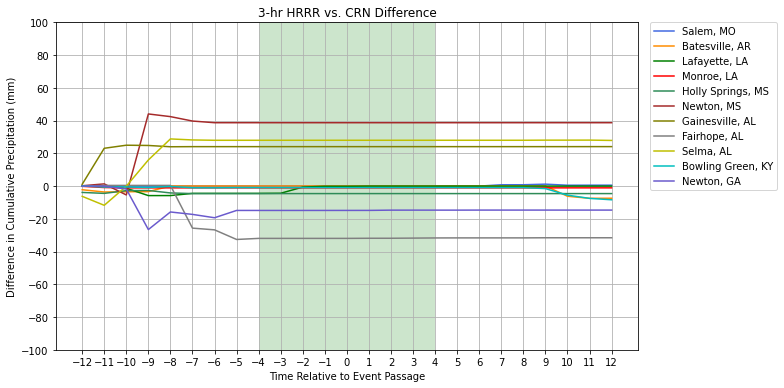

In [283]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff3_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff3_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff3_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff3_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff3_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff3_new,c='brown',label="Newton, MS")
plt.plot(hour,diff3_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff3_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff3_sel,c='y',label="Selma, AL")
plt.plot(hour,diff3_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff3_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff3_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("3-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

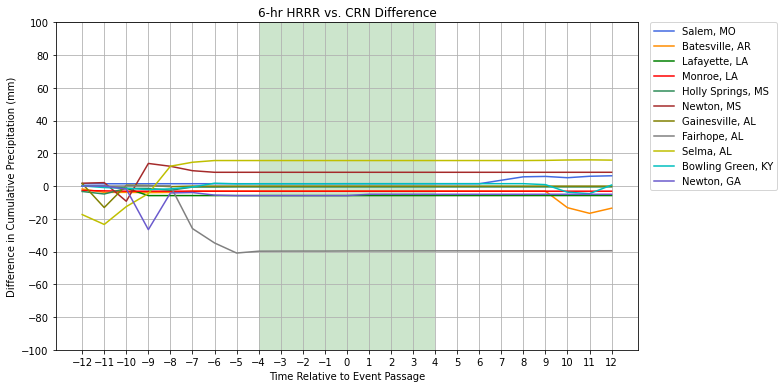

In [284]:
#plot 6-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff6_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff6_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff6_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff6_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff6_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff6_new,c='brown',label="Newton, MS")
plt.plot(hour,diff6_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff6_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff6_sel,c='y',label="Selma, AL")
plt.plot(hour,diff6_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff6_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff6_newt,c='slateblue',label="Newton, GA")


plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("6-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

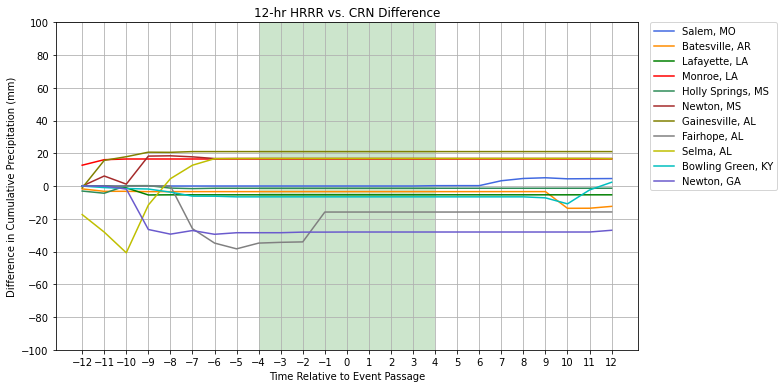

In [285]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff12_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff12_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff12_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff12_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff12_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff12_new,c='brown',label="Newton, MS")
plt.plot(hour,diff12_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff12_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff12_sel,c='y',label="Selma, AL")
plt.plot(hour,diff12_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff12_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff12_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("12-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

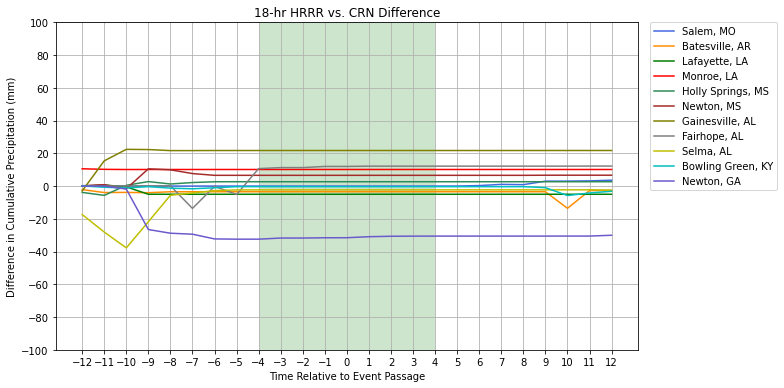

In [286]:
#plot 3-hr:
plt.rcParams["figure.figsize"] = [11.00, 5.50]
plt.rcParams["figure.autolayout"] = True
#default_x_ticks= range(len(hour))
# plt.plot(hour,temp,label="HRRR")
# plt.plot(hour,temp_crn,label="CRN")
plt.plot(hour,diff18_sal,c='royalblue',label="Salem, MO")
plt.plot(hour,diff18_bat,c='darkorange',label="Batesville, AR")
plt.plot(hour,diff18_laf,c='g',label="Lafayette, LA")
plt.plot(hour,diff18_mon,c='r',label="Monroe, LA")
plt.plot(hour,diff18_hol,c='seagreen',label="Holly Springs, MS")
plt.plot(hour,diff18_new,c='brown',label="Newton, MS")
plt.plot(hour,diff18_gai,c='olive',label="Gainesville, AL")
plt.plot(hour,diff18_fai,c='gray',label="Fairhope, AL")
plt.plot(hour,diff18_sel,c='y',label="Selma, AL")
plt.plot(hour,diff18_bow,c='c',label="Bowling Green, KY")
#plt.plot(hour,diff18_gad,c='mediumorchid',label="Gadsden, AL")
plt.plot(hour,diff18_newt,c='slateblue',label="Newton, GA")

plt.yticks(np.arange(-100, 120,20))
plt.ylim(-100, 100)
plt.title("18-hr HRRR vs. CRN Difference")
plt.xlabel("Time Relative to Event Passage")
plt.ylabel("Difference in Cumulative Precipitation (mm)")
plt.xticks(np.arange(min(hour), max(hour)+1, 1.0))
plt.axvspan(-4, 4, color='green', alpha=0.2, lw=0)
#plt.grid(axis='y')
plt.grid()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()